In [2]:
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [4]:
L = 1
nt = 100
nx = 51
alpha = 1.22e-3

dx = L/(nx - 1)

Ti = numpy.zeros(nx)
Ti[0] = 100

In [5]:
def ftcs(T, nt, dt, dx, alpha):
    """Solves the diffusion equation with FTCS scheme
    
    Parameters:
        T - initial temp. profile
        nt - number of time steps
        dx - mesh spacing
        alpha - diffusion coefficient (thermal diffusivity)
        
    Returns: 
        T - temp profile after nt time steps
    """
    
    for n in range (nt):
        Tn = T.copy()
        T[1:-1] = Tn[1:-1] + alpha*dt/dx**2*(Tn[2:] - 2*Tn[1:-1] + Tn[0:-2])
        
    return T

In [7]:
sigma = 1/2.0
dt = sigma * dx**2/alpha
T = ftcs(Ti.copy(), nt, dt, dx, alpha)

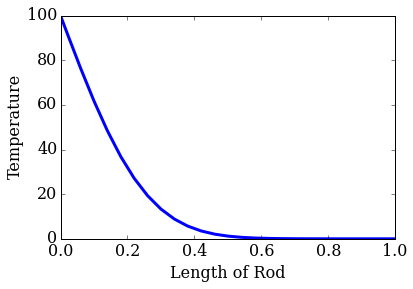

In [8]:
pyplot.plot(numpy.linspace(0,1,nx), T, ls = '-', lw = 3)
pyplot.ylim(0, 100)
pyplot.xlabel('Length of Rod')
pyplot.ylabel('Temperature');

In [9]:
nt = 1000
T = ftcs(Ti.copy(), nt, dt, dx, alpha )

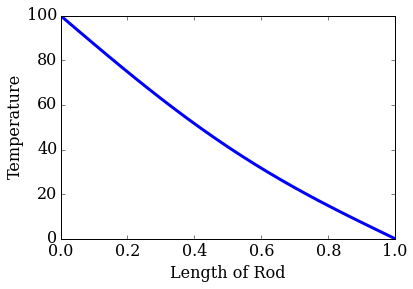

In [10]:
pyplot.plot(numpy.linspace(0,1,nx), T, ls = '-', lw = 3)
pyplot.ylim(0, 100)
pyplot.xlabel('Length of Rod')
pyplot.ylabel('Temperature');

In [11]:
def ftcs_mixed(T, nt, dt, dx, alpha):
    """Solves the diffusion equation with FTCS using Dirichlet BC at 
        left boundary and Neumann BC at right boundary
        
        Parameters:
            u - initial temperature profile
            nt - number of time steps
            dt - step size
            dx - spatial discretization
            alpha - diffusion coefficient
            
        Returns:
            u - Temperature profile after nt time steps with FT scheme
    """
    
    for n in range(nt):
        Tn = T.copy()
        T[1:-1] = Tn[1:-1] + alpha*dt/dx**2*(Tn[2:] - 2*Tn[1:-1] + Tn[0:-2])
        T[-1] = T[-2]
        
    return T

In [12]:
nt = 1000
T = ftcs_mixed(Ti.copy(), nt, dt, dx, alpha)

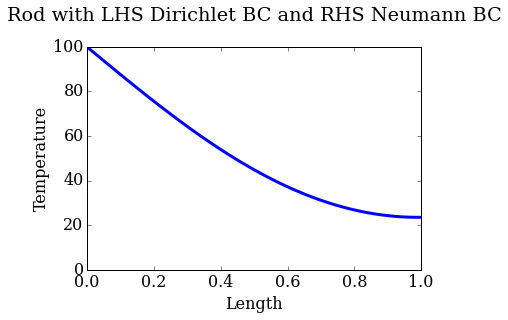

In [13]:
pyplot.plot(numpy.linspace(0,1,nx), T, lw = 3)
pyplot.ylim(0, 100)
pyplot.title('Rod with LHS Dirichlet BC and RHS Neumann BC\n')
pyplot.ylabel('Temperature')
pyplot.xlabel('Length');